# Graph Theory Analysis

### Pearson

100%|████████████████████████████████████| 2000/2000 [00:00<00:00, 79256.70it/s]

Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


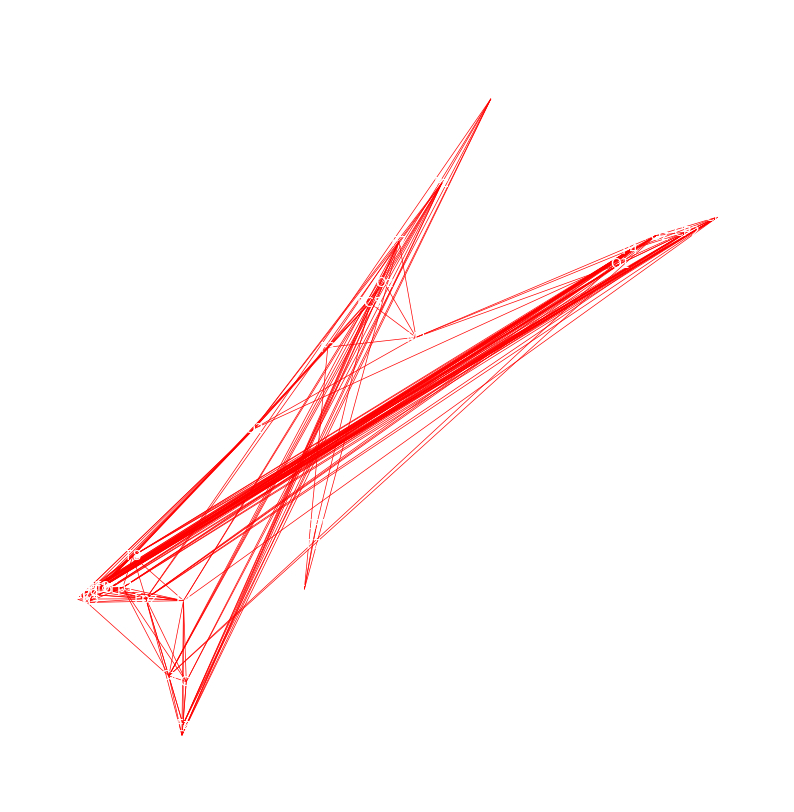

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from fa2 import ForceAtlas2
import networkx as nx
from scipy.sparse import lil_matrix

# EEG Channel Names
eeg_channel_names = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6',
                    'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6',
                    'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2']

# Load EEG data
eeg_data_array = np.load('/home/vincent/AAA_projects/MVCS/Neuroscience/eeg_data_with_channels.npy', allow_pickle=True)

# Compute connectivity matrix (Pearson correlation)
corr_matrix = np.corrcoef(eeg_data_array.T) 

# Create an empty graph
G = np.zeros_like(corr_matrix)

# Add edges to the graph based on correlation matrix
for i in range(G.shape[0]):
    for j in range(i + 1, G.shape[1]):
        weight = corr_matrix[i, j]
        if abs(weight) >= 0.5:
            G[i, j] = weight
            G[j, i] = weight

# Convert the adjacency matrix into a networkx graph
graph = nx.from_numpy_array(G)

# Convert the graph to a SciPy sparse matrix manually
M = lil_matrix(nx.adjacency_matrix(graph))

# Use ForceAtlas2 for layout
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  
    linLogMode=False,
    adjustSizes=False,
    edgeWeightInfluence=1.0,

    # Performance
    jitterTolerance=1.0,
    barnesHutOptimize=False,
    barnesHutTheta=1,
    multiThreaded=False,

    # Tuning
    scalingRatio=10.0,    # Adjust this to make nodes repel each other more strongly
    strongGravityMode=False,
    gravity=1.0,         # Adjust this to make nodes attract to the center more or less

    # Log
    verbose=True
)

# Bypass the forceatlas2_networkx_layout method and use forceatlas2 directly
positions = forceatlas2.forceatlas2(M, pos=None, iterations=2000)

# Convert positions to dictionary format for networkx
positions_dict = {i: positions[i] for i in range(len(positions))}


# Draw the graph with labels
fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('black')  # Set the figure background to black

ax = plt.gca()
ax.set_facecolor('black')  # Set the axis background color to black

node_labels = {node: name for node, name in enumerate(eeg_channel_names)}
nx.draw(graph, pos=positions_dict, labels=node_labels, node_size=0, font_size=10, 
        edge_color="red", font_color="white", width=0.5, with_labels=True, node_shape='')

plt.title("EEG Functional Connectivity Network using ForceAtlas2", color="white")  # Set title color to white
plt.axis('off')  # To ensure no axis is shown
plt.show()


### Phase Space

### Coherence